In [1]:
from tape import Ensemble, ColumnMapper
import matplotlib.pyplot as plt
import numpy as np

In [2]:
datapath = "/astro/store/epyc3/data3/alerce_alerts/parquet/"

names = []
for i in range(12,36):
    name = datapath+f"source/lcs_00{i}.parquet"
    names.append(name)

ens = Ensemble()

colmap = ColumnMapper(id_col="oid",
                      time_col="mjd",
                      flux_col="magpsf_corr",
                      err_col="sigmapsf_corr_ext",
                      band_col="fid")
ens.from_parquet(source_file=names,
                #source_file=datapath+"source/lcs_000*.parquet",
                 #object_file=datapath+"object/*.parquet",
                 column_mapper=colmap,
                 sort=True)

ens.query("fid == 1", table="source").prune(30)
ens.calc_nobs()

/astro/users/brantd/.conda/envs/py310/lib/python3.10/site-packages/dask/dataframe/core.py:5214: UserWarning: New index has same name as existing, this is a no-op.
  warnings.warn(


In [7]:
ens._source.head(5)

,candid,mjd,fid,pid,diffmaglim,isdiffpos,nid,ra,dec,magpsf,...,rfid,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext,corrected,dubious,parent_candid,has_stamp,step_id_corr,provenance
oid,,,,,,,,,,,,,,,,,,,,,
ZTF17aaaaaes,592485571615010000,58346.485579,1,592485571615,20.317383,-1,592,77.541663,47.395851,18.893904,...,743120116.0,17.318604,0.031352,0.034675,True,False,6.155120e+17,False,bulk_1.0.0,survey_1
ZTF17aaaaaes,596476901615015003,58350.476910,1,596476901615,20.636425,1,596,77.541832,47.395970,18.224588,...,743120116.0,16.762804,0.027860,0.029240,True,False,6.255132e+17,False,bulk_1.0.0,survey_1
ZTF17aaaaaes,598393291615010001,58352.393299,1,598393291615,19.920400,-1,598,77.541896,47.396056,19.067700,...,NaN,17.281603,0.040068,0.042549,True,False,6.255132e+17,False,bulk_1.0.0,survey_1
ZTF17aaaaaes,609512141615015002,58363.512141,1,609512141615,19.504436,1,609,77.541850,47.396120,18.268097,...,743120116.0,16.773958,0.037734,0.038786,True,False,6.255132e+17,False,bulk_1.0.0,survey_1
ZTF17aaaaaes,610471361615015000,58364.471366,1,610471361615,19.858070,1,610,77.541825,47.396166,18.039780,...,743120116.0,16.711610,0.043024,0.043850,True,False,6.255132e+17,False,bulk_1.0.0,survey_1


In [4]:
print(len(ens._object))

117588


unique_lengths: 814


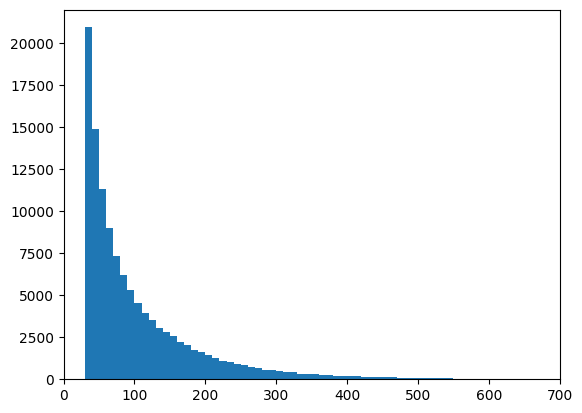

In [5]:
nobs_data = ens._object["nobs_total"].values.compute()
binwidth=10
plt.hist(nobs_data, bins=np.arange(min(nobs_data), max(nobs_data) + binwidth, binwidth))
plt.xlim(0,700)

print(f"unique_lengths: {len(np.unique(nobs_data))}")